# Overview

In this assignment you will learn how to:
1. Fit data to a line
2. Interpret the fit parameters
3. Plot the fit on top of the data.

Read through the instruction and examples first and then complete the problem at the bottom:

## Fitting data to a function.

Often in science, we collect data and then want to find a function that fits the data.  This process of gathering data and then finding a function that fits the data often uncovers useful relationships between the physical quantities.

Imagine that you have the following data involving the velocity of an object at various times.

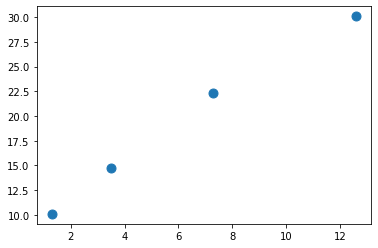

In [2]:
t = [1.3,3.5,7.3,12.6]
v = [10.1,14.7,22.3,30.1]
from matplotlib import pyplot
pyplot.plot(t,v,'.',ms = 18)
pyplot.show()

Now suppose you wanted to find a linear function that fits to this data.  Here is how you would do it: (Pay careful attention to the comments to see what each line does.)



In [3]:
# This is how you define a function in python.
# A function is something that takes some inputs
# and returns an output.
# In this case, 'func' is the name that I chose for the function. 
# 't'(time), 'm'(slope), and 'b'(y-intercept)
# are all variables that must be passed in when
# this function is called.
#
# The 'return' statement species what the function
# will return 
def func(t,m,b):
    return m * t + b

import scipy.optimize as opt 
# The 'curve_fit' function takes as argument:
# 1- the name of the function that we are going to fit to the data
# 2- The data set for the independent variable (horizontal axis)
# 3- The data set for the dependent variable (vertical axis)
#
#  This function will then return the values for 'm' and 'b'
# along with the uncertainties in those values.
# Note that the fitting function can have as many
# fit parameters as you need (here we had two) and the
# curve_fit function will return values for all of them
fitparams = opt.curve_fit(func,t,v)
m = fitparams[0][0]
b = fitparams[0][1]
print(m)
print(b)

1.7684009937213572
8.38012386377062


In this examples, the function we are looking for has slope 1.768 and y-intercept 8.38.  Let's see if we can plot it on top of the data to verify that it really is a good fit.

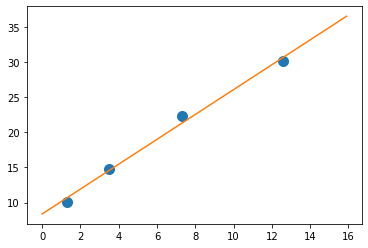

In [18]:
from numpy import arange
pyplot.plot(t,v,'.',ms=20)
tDense = arange(0,16,.1)
vFunc = m * tDense + b
pyplot.plot(tDense,vFunc)
pyplot.show()

Sure enough. Looks like a good fit.  Now comes the fun part.  We just fit velocity vs. time data.  Can you draw on your physics knowledge and think of an equation that is relevant to this information:

$$v_f = v_i + a \Delta t$$

Can you see that this is a linear function?  The slope of this function is the acceleration and the y-intercept is the initial velocity.    Hence, we can conclude that:

$$a = 1.768 \text{ m/s}^2$$  
$$v_i = 8.38  \text{ m/s}$$

## Your problem

Your engineering firm has been asked to determine the
  deceleration of a car during hard braking.  To do so, you decide to
  measure the lengths of the skid marks when stopping from various
  initial speeds.   Your data are as follows 
  
  
| speed (m/s) | Skid length (m) |
| ----------- | --------------- |
|10           |                7|
|15           |               14|
|20           |               27|
|25           |               37|
|30           |               58|



1. Make a plot of $v^2$ vs skid length.
2. Does the plot look linear? Under what circumstances would you expect it to be linear?  (Think about the kinematic equations.)
3. Fit the data set to a linear function.
4. Use the fit parameters to determine the acceleration of the car.
5. Plot the fit function *and* the data on the same plot to verify that the fit is good.


Initial velocity: 900 m/s
Skid length: 58 m
Acceleration:-714.2857142857143 m/s^2

Initial velocity: 900 m/s
Skid length: 58 m
Acceleration:-1808.0357142857142 m/s^2

Initial velocity: 900 m/s
Skid length: 58 m
Acceleration:-2962.962962962963 m/s^2

Initial velocity: 900 m/s
Skid length: 58 m
Acceleration:-5278.716216216216 m/s^2

Initial velocity: 900 m/s
Skid length: 58 m
Acceleration:-6982.758620689655 m/s^2

m = 0.06269113149642658
b = 0.3889908256867606


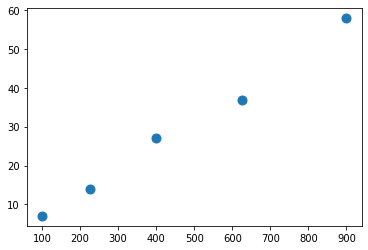

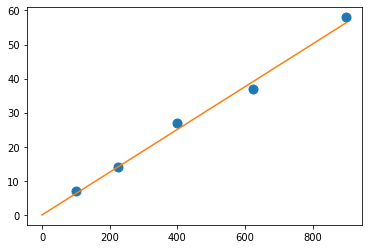

In [5]:
#Third Kinematic: f_velocity**2 = i_velocity**2 + 2 * acceleration * delta_x
#Third Kinematic solved for acceleration: acceleration = f_velocity**2 - i_velocity**2 / (2 * delta_x) 

def determine_acceleration(i_velocity, f_velocity, delta_x):
    return f_velocity**2 - i_velocity**2 / (2 * delta_x)  

def func(t,m,b):
    return m * t + b

speed = [10, 15, 20, 25, 30]
skid = [7, 14, 27, 37, 58]

#Square the speed
velocity = []
for i in speed:
    velocity.append(i ** 2)

#Find acceleration for each test
for (i_velocity, delta_x) in zip(velocity, skid):
    print(f'Initial velocity: {x} m/s\nSkid length: {y} m\nAcceleration:{determine_acceleration(i_velocity, 0, delta_x)} m/s^2\n')


#Plot graphs
import scipy.optimize as opt 
fitparams = opt.curve_fit(func, velocity, skid)
m = fitparams[0][0]
b = fitparams[0][1]
print(f'm = {m}')
print(f'b = {b}')

from matplotlib import pyplot
pyplot.plot(velocity,skid,'.',ms = 18)
pyplot.show()

from numpy import arange
pyplot.plot(velocity,skid,'.',ms=18)
tDense = arange(0,30**2,.1)
vFunc = m * tDense
pyplot.plot(tDense,vFunc)
pyplot.show()